In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import io
import os
import random
import string
import warnings
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import warnings
warnings.filterwarnings('ignore')

In [3]:
import nltk
from nltk.tokenize import sent_tokenize
from nltk.corpus import words
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *

In [4]:
# sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [5]:
# python imports
import re
import json
from collections import Counter

In [6]:
# Visualization
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from wordcloud import WordCloud
from tqdm import tqdm_notebook

In [7]:
# Saving models
import pickle

In [8]:
os.chdir('/content/drive/MyDrive/DIGI405 /corpus/AT_18_20')

In [9]:
os.getcwd()

'/content/drive/MyDrive/DIGI405 /corpus/AT_18_20'

In [10]:
# # combine multiple files into one files australia tourism before pandemic
# import os

# # Set the directory containing your text files
# directory = '/content/drive/MyDrive/DIGI405 /corpus/AT_18_20/'

# # Create an empty list to store the content of each file
# all_texts = []

# # Loop through every file in the directory
# for filename in os.listdir(directory):
#     if filename.endswith('.txt'):  # Check if the file is a text file
#         filepath = os.path.join(directory, filename)
#         with open(filepath, 'r', encoding='utf-8') as file:
#             all_texts.append(file.read())  # Add the content of the file to the list

# # Combine all texts into a single string
# combined_text = '\n'.join(all_texts)

# # Path for the new file
# new_file_path = '/content/drive/MyDrive/DIGI405 /corpus/AT_18_20/combined_file.txt'

# # Write the combined text to a new file
# with open(new_file_path, 'w', encoding='utf-8') as file:
#     file.write(combined_text)

# print("All files have been combined into one.")


In [11]:
import nltk
from nltk.text import Text
from nltk.tokenize import word_tokenize

# Make sure to download the required NLTK resources first
nltk.download('punkt')

# Load your text data
with open("/content/drive/MyDrive/DIGI405 /corpus/AT_18_20/combined_file.txt", "r", encoding="utf-8") as file:
    text_data = file.read()

# Tokenize the text data
tokens = word_tokenize(text_data)
text_obj = Text(tokens)

# Find and print concordance for "tourism" and "tourist"
print("Concordance for 'tourism':")
text_obj.concordance("tourism", lines=25)

print("\nConcordance for 'tourist':")
text_obj.concordance("tourist", lines=25)


print("\nConcordance for 'australian':")
text_obj.concordance("australian", lines=25)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Concordance for 'tourism':
Displaying 25 of 208 matches:
ent drought in the hotel sector.The tourism boom of 2013 to 2017 was the cataly
 was scheduled for a 2022 opening . Tourism industry makes most of visitor slow
stry makes most of visitor slowdown Tourism businesses are making the most of a
f those visitors ’ home countries . Tourism New Zealand says holidaymaker growt
h — the spend figures are growing , tourism is still contributing to the econom
ing in the last five years , ” says Tourism Industry Aotearoa chief executive C
shows that more than 40 per cent of tourism businesses questioned believe busin
etting value over volume . Domestic tourism , which accounts for almost 60 per 
national visitors could be spent on tourism . He says the plan to build up tour
rism . He says the plan to build up tourism over the shoulder seasons and in th
g — slowly . The chief executive of Tourism Holdings Ltd , Grant Webster , says
nfrastructure for the next phase. ” Tourism surged around the 2

### topic modeling

In [12]:
# topic modeling
!pip install nltk
from nltk.tokenize import RegexpTokenizer
nltk.download('stopwords')

from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


preprocess_data function is aim to clean the corpus before futher analysis ( such as tokenizer, remove stopwords, convert to lower case)

In [13]:
def preprocess_data(doc_set, extra_stopwords={}):
    # adapted from https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

    # replace all newlines or multiple sequences of spaces with a standard space
    doc_set = [re.sub(r'\s+', ' ', doc_set)]

    # initialize regex tokenizer
    tokenizer = RegexpTokenizer(r'\w+')

    # create English stop words list
    en_stop = set(stopwords.words('english'))

    # add any extra stopwords
    if (len(extra_stopwords) > 0):
        en_stop = en_stop.union(extra_stopwords)

    # list for tokenized documents in loop
    texts = []
    # loop through document list
    for i in doc_set:
        # clean and tokenize document string
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)
        # remove stop words from tokens
        stopped_tokens = [i for i in tokens if not i in en_stop]
        # add tokens to list
        texts.append(stopped_tokens)

    return texts

In [14]:
doc_clean = preprocess_data(text_data, {})

In [15]:
# from nltk import word_tokenize
# from nltk.tokenize import WordPunctTokenizer
# from nltk.collocations import BigramCollocationFinder
# from nltk.metrics import BigramAssocMeasures
# from nltk.corpus import stopwords
# nltk.download('punkt')
# nltk.download('stopwords')


# # Create a Bigram Collocation Finder instance
# finder = BigramCollocationFinder.from_words(tokens)

# # Filter out bigrams with stopwords or that occur less frequently
# stop_words = set(stopwords.words('english'))
# filter_stops = lambda w: len(w) < 3 or w in stop_words
# finder.apply_word_filter(filter_stops)

# # Find the top 5 bigrams using different association measures
# bigrams_pmi = finder.nbest(BigramAssocMeasures.pmi, 5)  # Pointwise Mutual Information
# bigrams_likelihood = finder.nbest(BigramAssocMeasures.likelihood_ratio, 5)  # Likelihood Ratio

# print("Top 5 Bigrams by PMI:", bigrams_pmi)
# print("Top 5 Bigrams by Likelihood Ratio:", bigrams_likelihood)


In [16]:
# import nltk
# from nltk.collocations import BigramCollocationFinder
# from nltk.collocations import BigramAssocMeasures


# # Filter out stopwords to focus on more meaningful bigrams
# stop_words = set(stopwords.words('english'))

# tokens = [token for token in tokens if token not in stop_words]

# # Create a Bigram Collocation Finder instance
# finder = BigramCollocationFinder.from_words(tokens)

# # Choose a measure of association for ranking bigrams
# bigram_measures = BigramAssocMeasures()

# # Find the top 5 bigrams by their association scores using Pointwise Mutual Information (PMI)
# top_five_bigrams = finder.nbest(bigram_measures.pmi, 5)

# # Optionally, you can also apply frequency filters
# finder.apply_freq_filter(2)  # for example, only bigrams that appear at least 2 times

# # Print the results
# print("Top 5 Bigrams by PMI:", top_five_bigrams)





In [17]:
flattened_doc = [word for sublist in doc_clean for word in sublist]

In [18]:
#term frequency
sns.set(style="darkgrid")
counts = Counter(flattened_doc).most_common(50)
counts_df = pd.DataFrame(counts)
counts_df.head(10)

,0,1
0,hotel,310
1,new,300
2,said,231
3,tourism,209
4,zealand,188
5,hotels,147
6,year,130
7,auckland,129
8,industry,122
9,would,113


In [19]:
counts_df.columns = ['word', 'frequency']

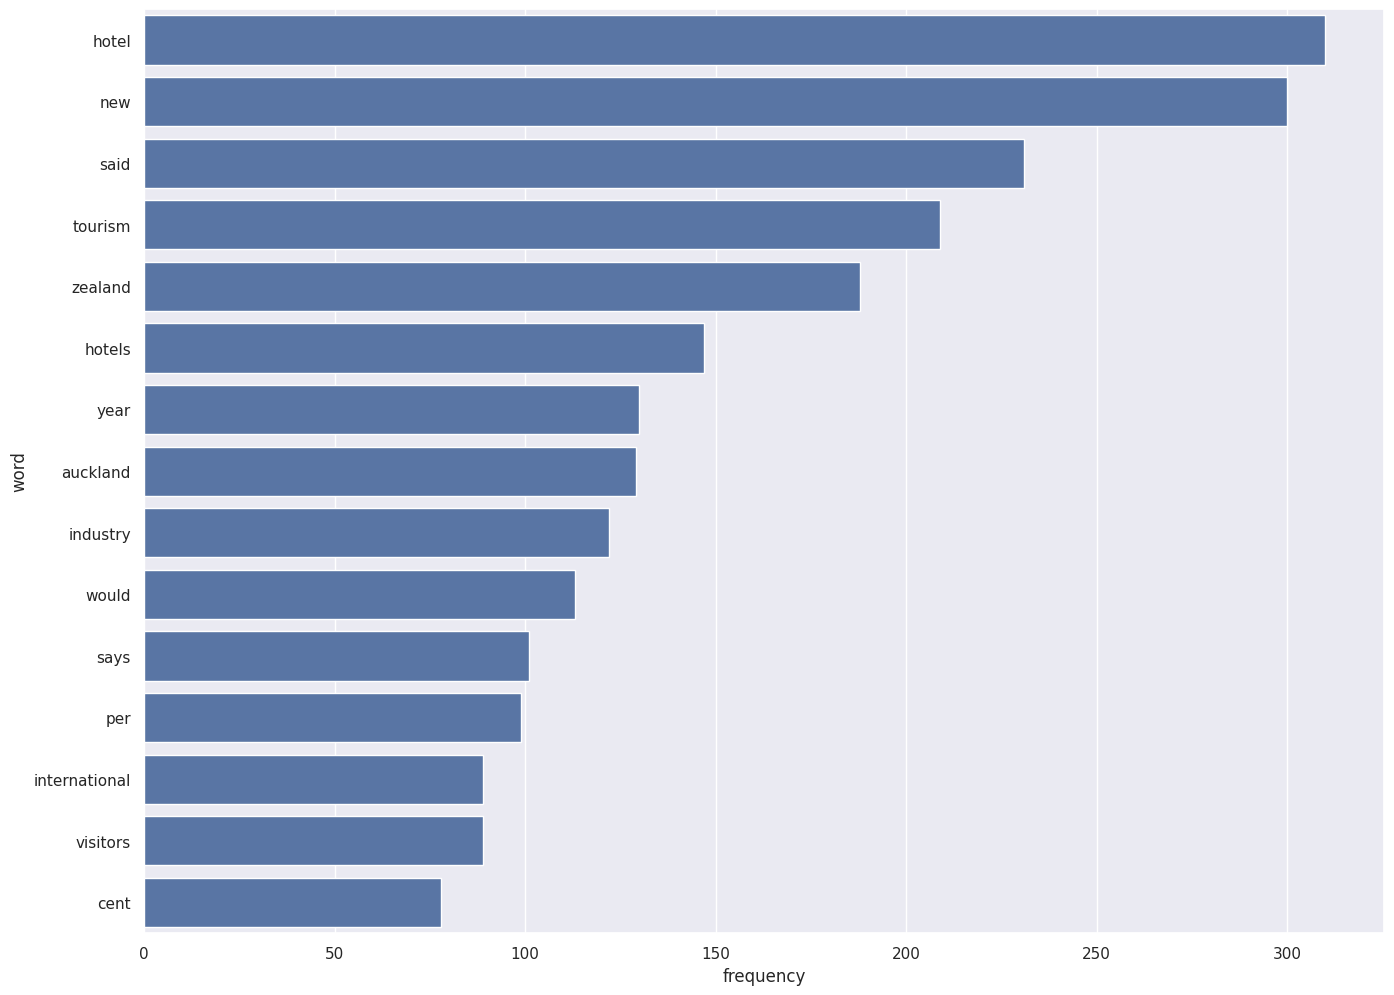

In [25]:
fig, ax = plt.subplots(figsize = (16, 12))
ax = sns.barplot(y="word", x='frequency', ax = ax, data=counts_df[:15])
plt.savefig('wordcount_bar.png')

In [23]:
wordcloud = WordCloud(
    background_color='black',
    max_words=50,
    max_font_size=40,
    scale=5,
    random_state=1,
    collocations=False,
    normalize_plurals=False
).generate(' '.join(tokens))

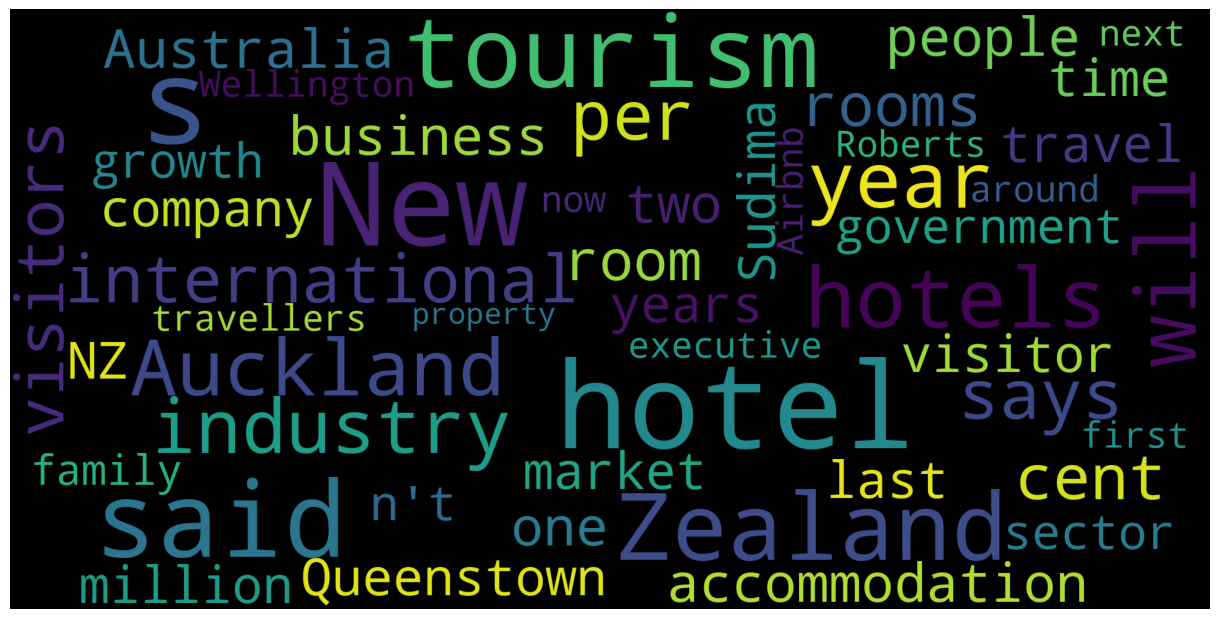

In [24]:
plt.figure(figsize = (12, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.savefig('wordcloud.png')